In [1]:
import cv2
import keras
import numpy as np
import matplotlib
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

In [2]:
orig_img_c = cv2.imread(r"D:\Data Science\Guvi\Company Assignments\Akaike Data_Science\Computer Vision\1.Sample-img1\original_image.jpg")

In [3]:
orig_img = cv2.cvtColor(orig_img_c, cv2.COLOR_BGR2GRAY)

In [4]:
full_ann_img_c = cv2.imread(r"D:\Data Science\Guvi\Company Assignments\Akaike Data_Science\Computer Vision\1.Sample-img1\fully_annotated_image.jpg")

In [6]:
full_ann_img = cv2.cvtColor(full_ann_img_c, cv2.COLOR_BGR2GRAY)

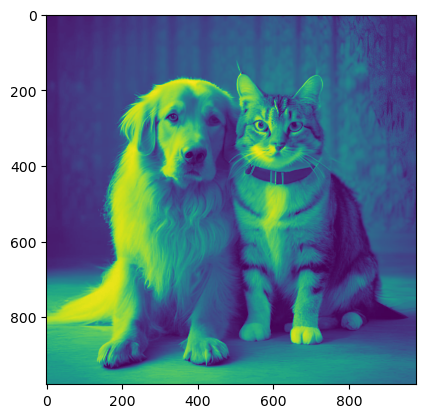

In [7]:
plt.imshow(orig_img)

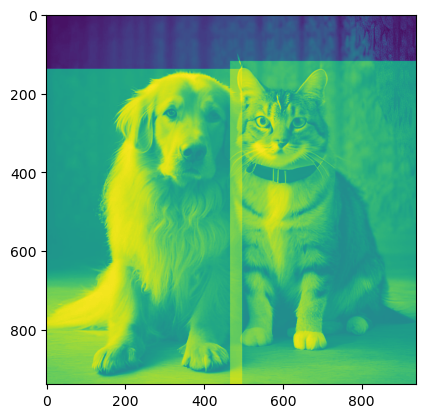

In [8]:
plt.imshow(full_ann_img)

### Checking for the size difference

In [9]:
orig_img

array([[ 15,  15,  15, ...,  45,  41,  41],
       [ 15,  15,  15, ...,  44,  42,  42],
       [ 15,  15,  15, ...,  43,  42,  42],
       ...,
       [135, 135, 134, ...,  89,  90,  90],
       [137, 139, 138, ...,  87,  87,  87],
       [135, 137, 136, ...,  87,  87,  87]], dtype=uint8)

In [10]:
# size of gray scale image
size = orig_img.shape
size

(978, 978)

In [11]:
full_ann_img

array([[ 16,  16,  16, ...,  30,  38,  44],
       [ 16,  16,  16, ...,  30,  36,  41],
       [ 16,  16,  16, ...,  28,  31,  33],
       ...,
       [197, 197, 196, ..., 168, 168, 169],
       [196, 197, 196, ..., 172, 172, 171],
       [195, 197, 196, ..., 174, 173, 173]], dtype=uint8)

In [12]:
full_ann_img.shape

(938, 939)

### Converting the size of full_ann_img_c to the size of ori_img_c (BRG Image)

In [13]:
rs_full_ann_img_c = cv2.resize(full_ann_img_c, size)

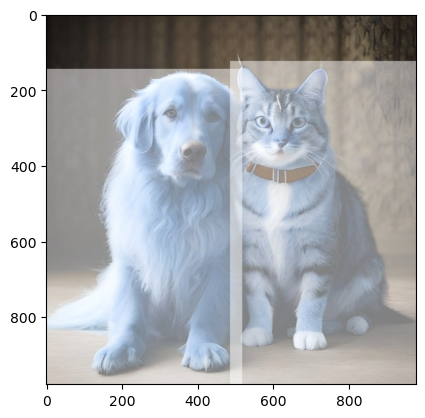

In [14]:
plt.imshow(rs_full_ann_img_c)

### Converting the size of full_ann_img to the size of ori_img (Gray Image)

In [15]:
rs_full_ann_img = cv2.resize(full_ann_img, size)

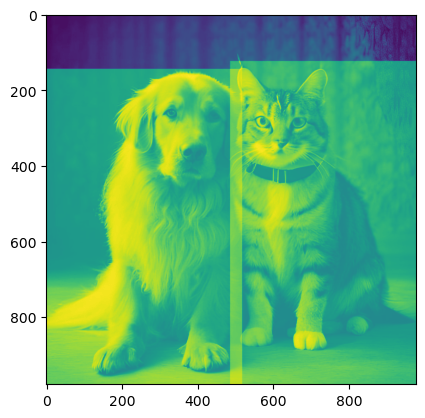

In [16]:
plt.imshow(rs_full_ann_img)

### Taking only the annotation by subtracting the full annotated image and original image

In [17]:
rs_full_ann_img - orig_img

array([[  1,   1,   1, ..., 242, 253,   3],
       [  1,   1,   1, ..., 242, 250, 255],
       [  1,   1,   1, ..., 241, 245, 248],
       ...,
       [ 62,  62,  62, ...,  79,  78,  79],
       [ 59,  58,  58, ...,  85,  85,  84],
       [ 60,  60,  60, ...,  87,  86,  86]], dtype=uint8)

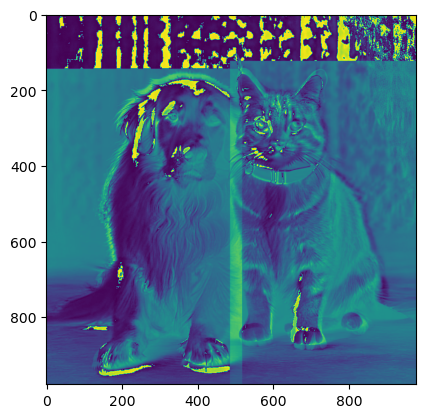

In [18]:
plt.imshow(rs_full_ann_img - orig_img)

### Applying Gaussian Blur to the subtracted image

In [19]:
fil_img = cv2.medianBlur(rs_full_ann_img - orig_img, 11)

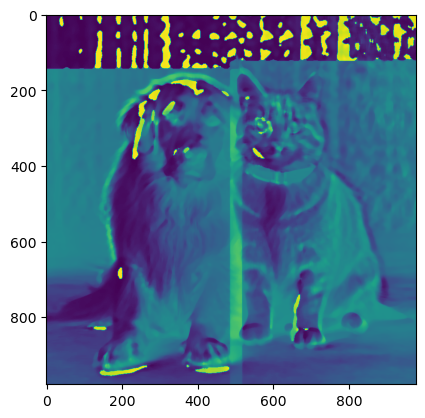

In [20]:
plt.imshow(fil_img)

### Applying Canny Edge Detection the blurred image

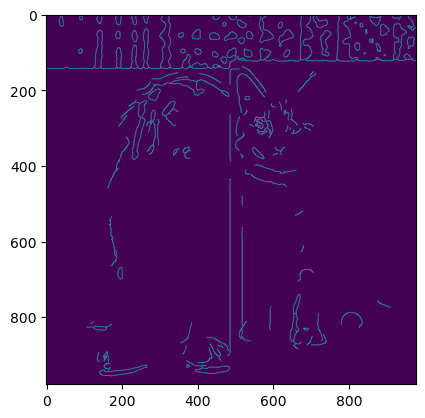

In [21]:
image_edges = cv2.Canny(fil_img,100,200)
plt.imshow(image_edges)

### Drawing the straight lines of the canny image to the seperate black image

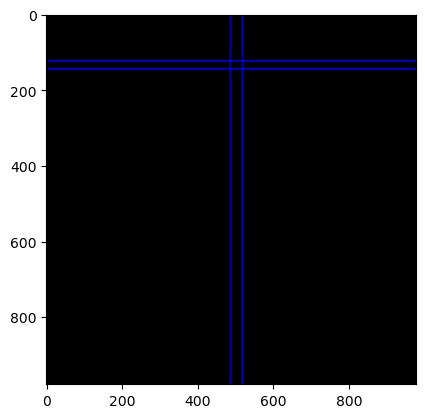

In [22]:
## Draw only the lines in seperate image

# Apply Hough Line Transform
lines = cv2.HoughLines(image_edges, 1, np.pi/180, 150)

# Draw the lines on a blank image
line_img = np.zeros((orig_img.shape[0], orig_img.shape[1], 3), dtype=np.uint8)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(line_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(line_img)

### Draw lines around the corners of the image

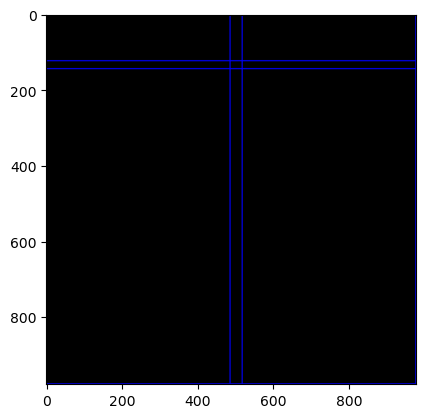

In [23]:
# Get the height and width of the image
h, w = line_img.shape[:2]

# Define the four corners of the image
top_left = (0, 0)
top_right = (w-1, 0)
bottom_left = (0, h-1)
bottom_right = (w-1, h-1)

# Draw lines in the four corners
cv2.line(line_img, top_left, bottom_left, (0, 0, 255), 2)
cv2.line(line_img, top_left, top_right, (0, 0, 255), 2)
cv2.line(line_img, top_right, bottom_right, (0, 0, 255), 2)
cv2.line(line_img, bottom_left, bottom_right, (0, 0, 255), 2)

plt.imshow(line_img)

#### Applying Gray Scale to the line image

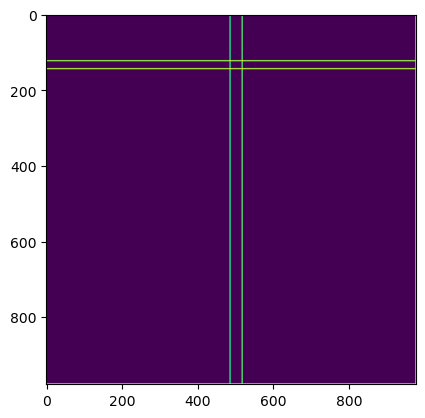

In [24]:
line_img_g = cv2.cvtColor(line_img, cv2.COLOR_BGR2GRAY)
plt.imshow(line_img_g)

#### Applying threshold to the line image

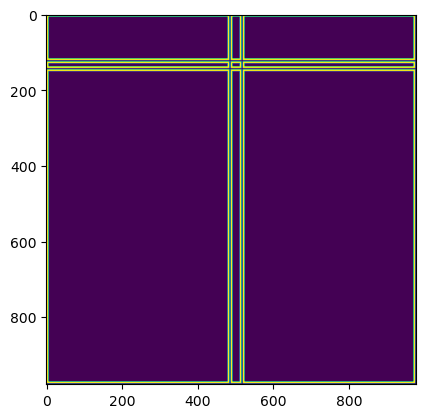

In [25]:
thresh = cv2.adaptiveThreshold(line_img_g, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
plt.imshow(thresh)

### Find all the combination of rectangle's axes

In [26]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [27]:
axes = []
for contour in contours:
    # Get the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Append the axes of the rectangle to the list
    axes.append((x, y, x + w, y + h))

    # Draw a rectangle around the contour
    cv2.rectangle(thresh, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Print the axes of the rectangles
# print('Axes of the rectangles:', axes)

# Display the image with the rectangles
# cv2.imshow('Image with Rectangles', line_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [28]:
len(axes)

9

In [29]:
axes

[(520, 146, 976, 976),
 (488, 146, 517, 976),
 (2, 146, 485, 976),
 (520, 125, 976, 143),
 (488, 125, 517, 143),
 (2, 125, 485, 143),
 (520, 2, 976, 122),
 (488, 2, 517, 122),
 (2, 2, 485, 122)]

## For every axes identifying whether it is a dog or not

#### Importing pickle model to identify cat or dog

In [30]:
import numpy as np
CATEGORIES = ['Cat', 'Dog']


def image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img, (60, 60))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 60, 60, 1)
    return new_arr

model = keras.models.load_model(r"C:\Users\Praveen\Desktop\3x3x64-catvsdog.model")

In [31]:
prediction = model.predict([image('axes.jpg')])

1/1 [==============================] - 0s 203ms/step


#### Looping through all the rectangles to find the rectangles with dog

In [32]:
# The model.pickle accuracy of finding dog is always not great. So if the model predicts there is no dog in any of the axes,
# I had taken a chance by finding a dog in the largest axes the model.pickle found to be a cat.

dog_ax = []
cat_ax = []
op_img = rs_full_ann_img_c
for ax in axes:
    x1, y1, x2, y2 = ax
    cv2.imwrite('aximg.jpg', orig_img_c[y1:y2, x1:x2])
    if CATEGORIES[prediction.argmax()] == 'Dog':
        dog_ax.append(ax)
    else:
        cat_ax.append(ax)

#### Find the max area rectange containing the dog

In [33]:
if len(dog_ax) > 0:
    l = dog_ax
else:
    l = cat_ax
m_area = 0
m_ar_dg_ax = l[0]
for i in l:
    area = abs(i[2] - i[0]) * abs(i[3] - i[1])
    if area > m_area:
        m_area = area
        m_ar_dg_ax = i

In [34]:
m_ar_dg_ax

(2, 146, 485, 976)

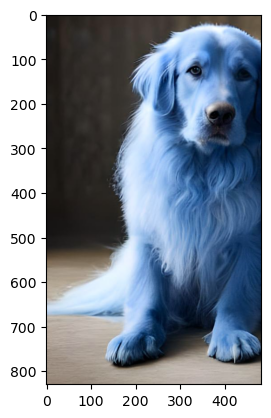

In [35]:
# x1, y1, x2, y2 = (520, 125, 976, 143)
x1, y1, x2, y2 = m_ar_dg_ax
imshow(orig_img_c[y1:y2, x1:x2])

## Getting Partially annotated image from the fully annotated and reference image

In [36]:
op_img = rs_full_ann_img_c

In [37]:
# Dogs Annotation boundary axes
x1, y1, x2, y2 = m_ar_dg_ax

In [38]:
op_img[y1:y2, x1:x2] = orig_img_c[y1:y2, x1:x2]

In [39]:
cv2.imwrite('axes.jpg', orig_img_c[y1:y2, x1:x2])

True

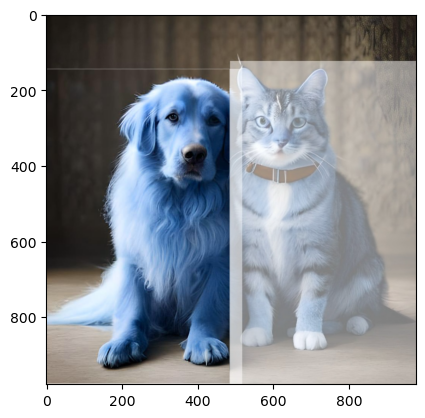

In [40]:
plt.imshow(op_img)

Now the image above shows the BRG format image, so the blue color is on top. When we save the image, we will get a RGB format image.

In [42]:
cv2.imwrite('removed_bgr.jpg', op_img)

True